## 라이브러리 불러오기 및 폰트 설정
- Numpy(Numerical Python)
    - 파이썬에서 과학적 계산을 위한 핵심 라이브러리
    - 다차원 배열 객체(ndarray)와 배열과 함께 작동하는 도구들을 제공
    - 다차원 행렬 자료구조인 ndarray를 통해 벡터 및 행렬을 사용하는 선형 대수 계산에서 주로 사용
    - Numpy는 편의성 뿐만 아니라, 속도면에서도 순수 파이썬에 비해 압도적으로 빠름

In [2]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
plt.rc("font", family="Malgun Gothic")
#마이너스 폰트 깨지는 문제에 대한 대처          
plt.rc("axes", unicode_minus=False)  

In [4]:
#레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
#폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

In [5]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 데이터 불러오기

In [6]:
df = pd.read_csv("data/dtg_02_1102.csv") #encoding = "cp949"를 통해 한글 폰트를 에러 없이 가져올 수 있음.
df.shape #이렇게 양이 많은 데이터를 엑셀로 분석한다면 매우 느리고 에러가 발생할 수 있기 때문에 판다스가 유용하다. 

(31531, 32)

In [13]:
df.head(3)

,단말ID,차대번호,트립시작일,정보발생일,누적주행거리,일일주행거리,차량속도,RPM,브레이크상태,차량위치X,...,운전자코드,메시지생성일자,메시지생성시간,응답코드,데이터길이,수집유형,DTG정보수,차량코드,차량번호,Column1
0,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:46:59,1195780,0,0,0,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
1,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:02,1195780,0,0,106,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
2,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:03,1195780,0,0,251,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN


## 기본 정보 보기

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31531 entries, 0 to 31530
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단말ID     31531 non-null  int64  
 1   차대번호     31531 non-null  object 
 2   트립시작일    31531 non-null  object 
 3   정보발생일    31531 non-null  object 
 4   누적주행거리   31531 non-null  int64  
 5   일일주행거리   31531 non-null  int64  
 6   차량속도     31531 non-null  int64  
 7   RPM      31531 non-null  int64  
 8   브레이크상태   31531 non-null  int64  
 9   차량위치X    31531 non-null  int64  
 10  차량위치Y    31531 non-null  int64  
 11  기기상태     31531 non-null  int64  
 12  일일연료사용량  31531 non-null  int64  
 13  누적연료사용량  31531 non-null  int64  
 14  배터리전압    31531 non-null  int64  
 15  일련번호     31531 non-null  int64  
 16  방위각      31531 non-null  int64  
 17  가속도X     31531 non-null  int64  
 18  가속도Y     31531 non-null  int64  
 19  메세지코드    31531 non-null  int64  
 20  기기모델     31531 non-null  object 
 21  사업자번호    315

In [15]:
df.columns

Index(['단말ID', '차대번호', '트립시작일', '정보발생일', '누적주행거리', '일일주행거리', '차량속도', 'RPM',
       '브레이크상태', '차량위치X', '차량위치Y', '기기상태', '일일연료사용량', '누적연료사용량', '배터리전압',
       '일련번호', '방위각', '가속도X', '가속도Y', '메세지코드', '기기모델', '사업자번호', '운전자코드',
       '메시지생성일자', '메시지생성시간', '응답코드', '데이터길이', '수집유형', 'DTG정보수', '차량코드', '차량번호',
       'Column1'],
      dtype='object')

In [16]:
df.dtypes

단말ID         int64
차대번호        object
트립시작일       object
정보발생일       object
누적주행거리       int64
일일주행거리       int64
차량속도         int64
RPM          int64
브레이크상태       int64
차량위치X        int64
차량위치Y        int64
기기상태         int64
일일연료사용량      int64
누적연료사용량      int64
배터리전압        int64
일련번호         int64
방위각          int64
가속도X         int64
가속도Y         int64
메세지코드        int64
기기모델        object
사업자번호        int64
운전자코드        int64
메시지생성일자     object
메시지생성시간      int64
응답코드         int64
데이터길이        int64
수집유형        object
DTG정보수       int64
차량코드         int64
차량번호        object
Column1    float64
dtype: object

In [17]:
df["단말ID"].count()

31531

In [9]:
# unique로 중복을 제거한 값을 보고 nunique로 그 개수를 세어본다. 
# ts: trip_start
ts = df["트립시작일"].unique()
ts

array(['2022-11-02 6:47', '2022-11-02 9:49', '2022-11-02 9:58',
       '2022-11-02 12:59', '2022-11-02 13:06', '2022-11-02 14:43',
       '2022-11-02 15:50', '2022-11-02 15:59', '2022-11-02 18:21'],
      dtype=object)

In [19]:
ts[0]

'2022-11-02 6:47'

In [20]:
df["트립시작일"].nunique()

9

In [21]:
df["정보발생일"].unique()

array(['2022-11-02 6:46:59', '2022-11-02 6:47:02', '2022-11-02 6:47:03',
       ..., '2022-11-02 20:18:00', '2022-11-02 20:18:01',
       '2022-11-02 20:18:02'], dtype=object)

In [22]:
df["정보발생일"].nunique()

31529

## 특정 데이터만 모아서 따로 보기

In [23]:
#"트립시작일"이 'ts[0]'에 해당하는 데이터만 가져와서 변수에 담기
#copy()를 해주면 df_ts0 변수에 변화가 생겨도 df 원본은 변하지 않기 때문에 안전하다.
df_ts0 = df[df["트립시작일"] == ts[0]].copy()
df_ts0

,단말ID,차대번호,트립시작일,정보발생일,누적주행거리,일일주행거리,차량속도,RPM,브레이크상태,차량위치X,...,운전자코드,메시지생성일자,메시지생성시간,응답코드,데이터길이,수집유형,DTG정보수,차량코드,차량번호,Column1
0,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:46:59,1195780,0,0,0,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
1,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:02,1195780,0,0,106,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
2,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:03,1195780,0,0,251,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
3,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:04,1195780,0,0,581,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
4,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:05,1195780,0,0,745,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 8:44:15,1195861,81,0,499,0,126646239,...,3529073,2022-11-02,84419,0,1726,C,21,15,충남72아6130,NaN
7037,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 8:44:16,1195861,81,0,500,0,126646238,...,3529073,2022-11-02,84419,0,1726,C,21,15,충남72아6130,NaN
7038,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 8:44:17,1195861,81,0,498,0,126646238,...,3529073,2022-11-02,84419,0,1726,C,21,15,충남72아6130,NaN
7039,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 8:44:18,1195861,81,0,499,0,126646238,...,3529073,2022-11-02,84419,0,1726,C,21,15,충남72아6130,NaN


In [10]:
for i in range(len(ts)):
    df_ts = df[df["트립시작일"] == ts[i]].copy()
    print(df_ts)

            단말ID               차대번호            트립시작일               정보발생일   
0     1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 6:46:59  \
1     1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 6:47:02   
2     1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 6:47:03   
3     1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 6:47:04   
4     1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 6:47:05   
...          ...                ...              ...                 ...   
7036  1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 8:44:15   
7037  1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 8:44:16   
7038  1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 8:44:17   
7039  1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 8:44:18   
7040  1229493044  KMJKG18KPGC011451  2022-11-02 6:47  2022-11-02 8:44:19   

       누적주행거리  일일주행거리  차량속도  RPM  브레이크상태      차량위치X  ...    운전자코드     메시지생성일자   
0     

In [24]:
len(ts)

9

In [ ]:
# 출발일시: 트립시작일
# 도착일시: 정보발생일(마지막 값)
# 운전자명:
# DTG 상태: 
# 운행 시간: 정보발생일(마지막 값)-트립시작일
# 운행 거리: 누적주행거리(마지막 값) - 누적주행거리(첫번째 값)
# 최고 속도: 차량속도(max)
# 평균 속도: 차량속도(average)
# 최고 RPM: max(RPM)
# 평균 RPM: average(RPM)
# 전압정보: 배터리 전압 (min~max)
# 과속시간: 과속의 기준이 뭔가요?
# 누적주행거리: 누적주행거리(마지막 값)

In [11]:
df_ts = df[df["트립시작일"] == ts[0]].copy()
df_ts

,단말ID,차대번호,트립시작일,정보발생일,누적주행거리,일일주행거리,차량속도,RPM,브레이크상태,차량위치X,...,운전자코드,메시지생성일자,메시지생성시간,응답코드,데이터길이,수집유형,DTG정보수,차량코드,차량번호,Column1
0,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:46:59,1195780,0,0,0,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
1,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:02,1195780,0,0,106,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
2,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:03,1195780,0,0,251,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
3,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:04,1195780,0,0,581,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
4,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 6:47:05,1195780,0,0,745,0,0,...,3529073,2022-11-02,64757,0,4924,C,60,15,충남72아6130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 8:44:15,1195861,81,0,499,0,126646239,...,3529073,2022-11-02,84419,0,1726,C,21,15,충남72아6130,NaN
7037,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 8:44:16,1195861,81,0,500,0,126646238,...,3529073,2022-11-02,84419,0,1726,C,21,15,충남72아6130,NaN
7038,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 8:44:17,1195861,81,0,498,0,126646238,...,3529073,2022-11-02,84419,0,1726,C,21,15,충남72아6130,NaN
7039,1229493044,KMJKG18KPGC011451,2022-11-02 6:47,2022-11-02 8:44:18,1195861,81,0,499,0,126646238,...,3529073,2022-11-02,84419,0,1726,C,21,15,충남72아6130,NaN


In [34]:
arr = df_ts["차량속도"]
arr

0       0
1       0
2       0
3       0
4       0
       ..
7036    0
7037    0
7038    0
7039    0
7040    0
Name: 차량속도, Length: 7041, dtype: int64

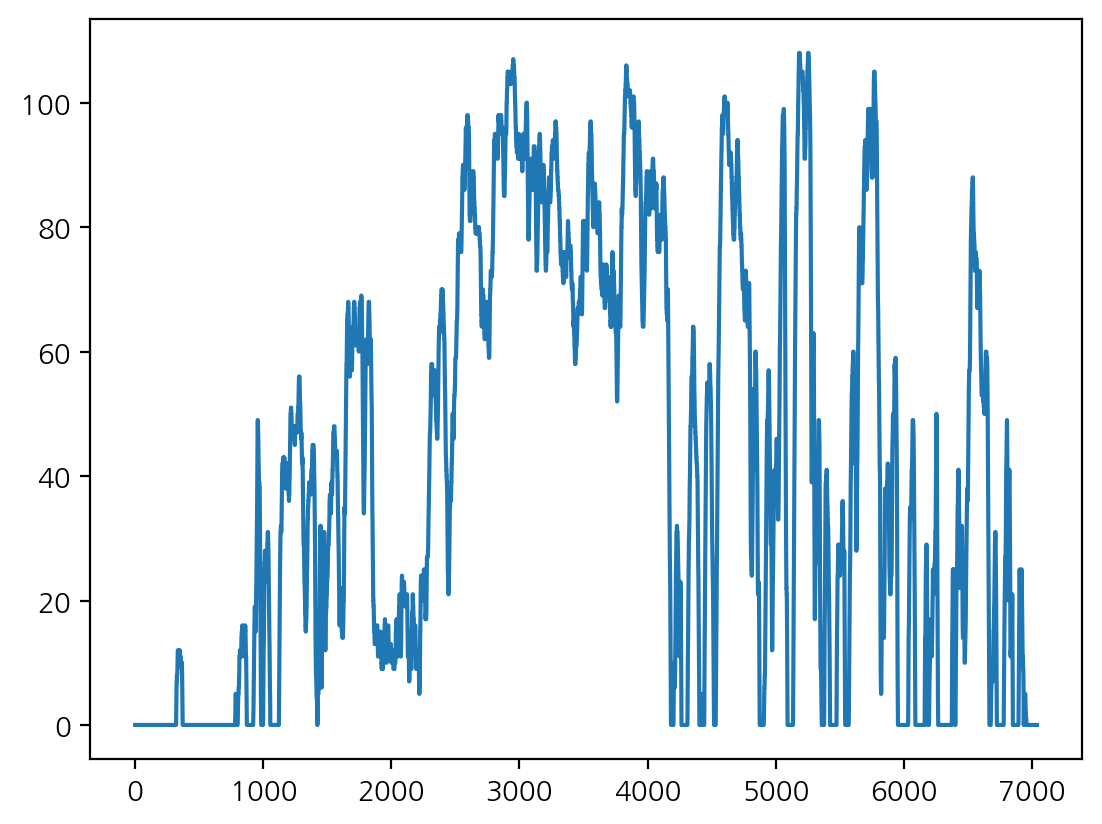

In [35]:
plt.plot(arr)
plt.show()



In [36]:
arr = df_ts["RPM"]
arr

0         0
1       106
2       251
3       581
4       745
       ... 
7036    499
7037    500
7038    498
7039    499
7040    500
Name: RPM, Length: 7041, dtype: int64

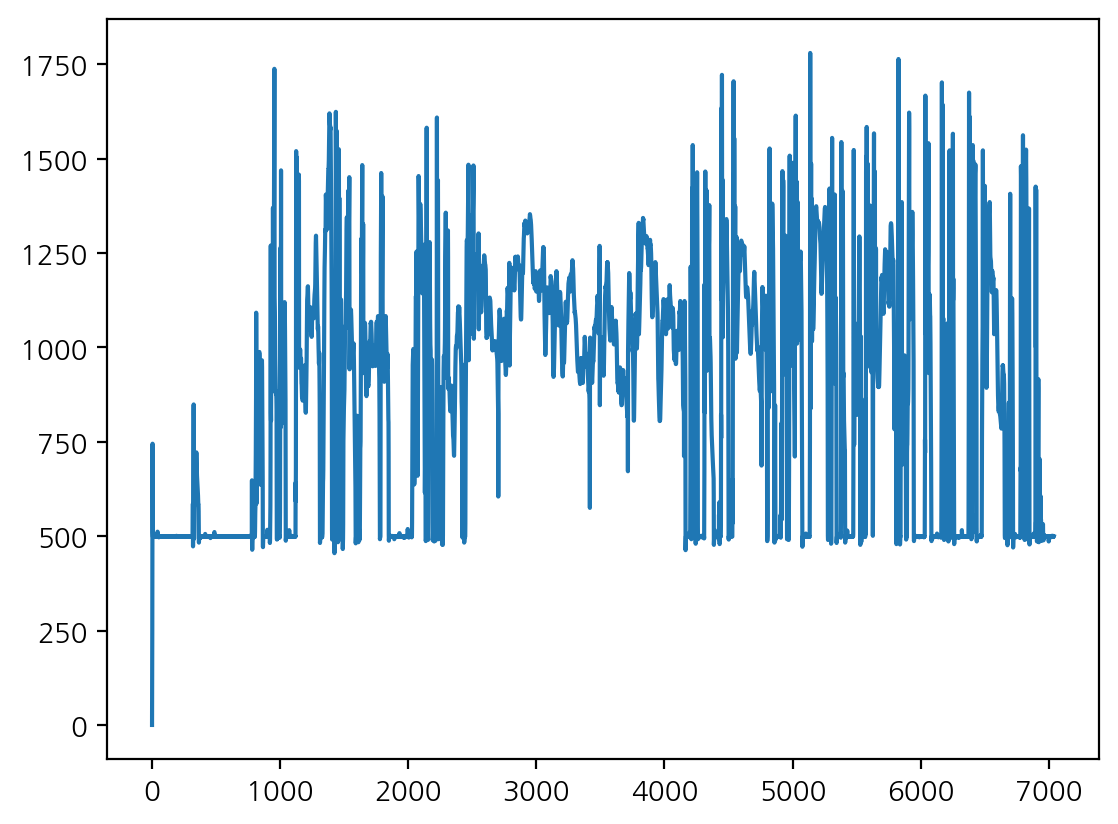

In [46]:
plt.plot(arr)
plt.show()

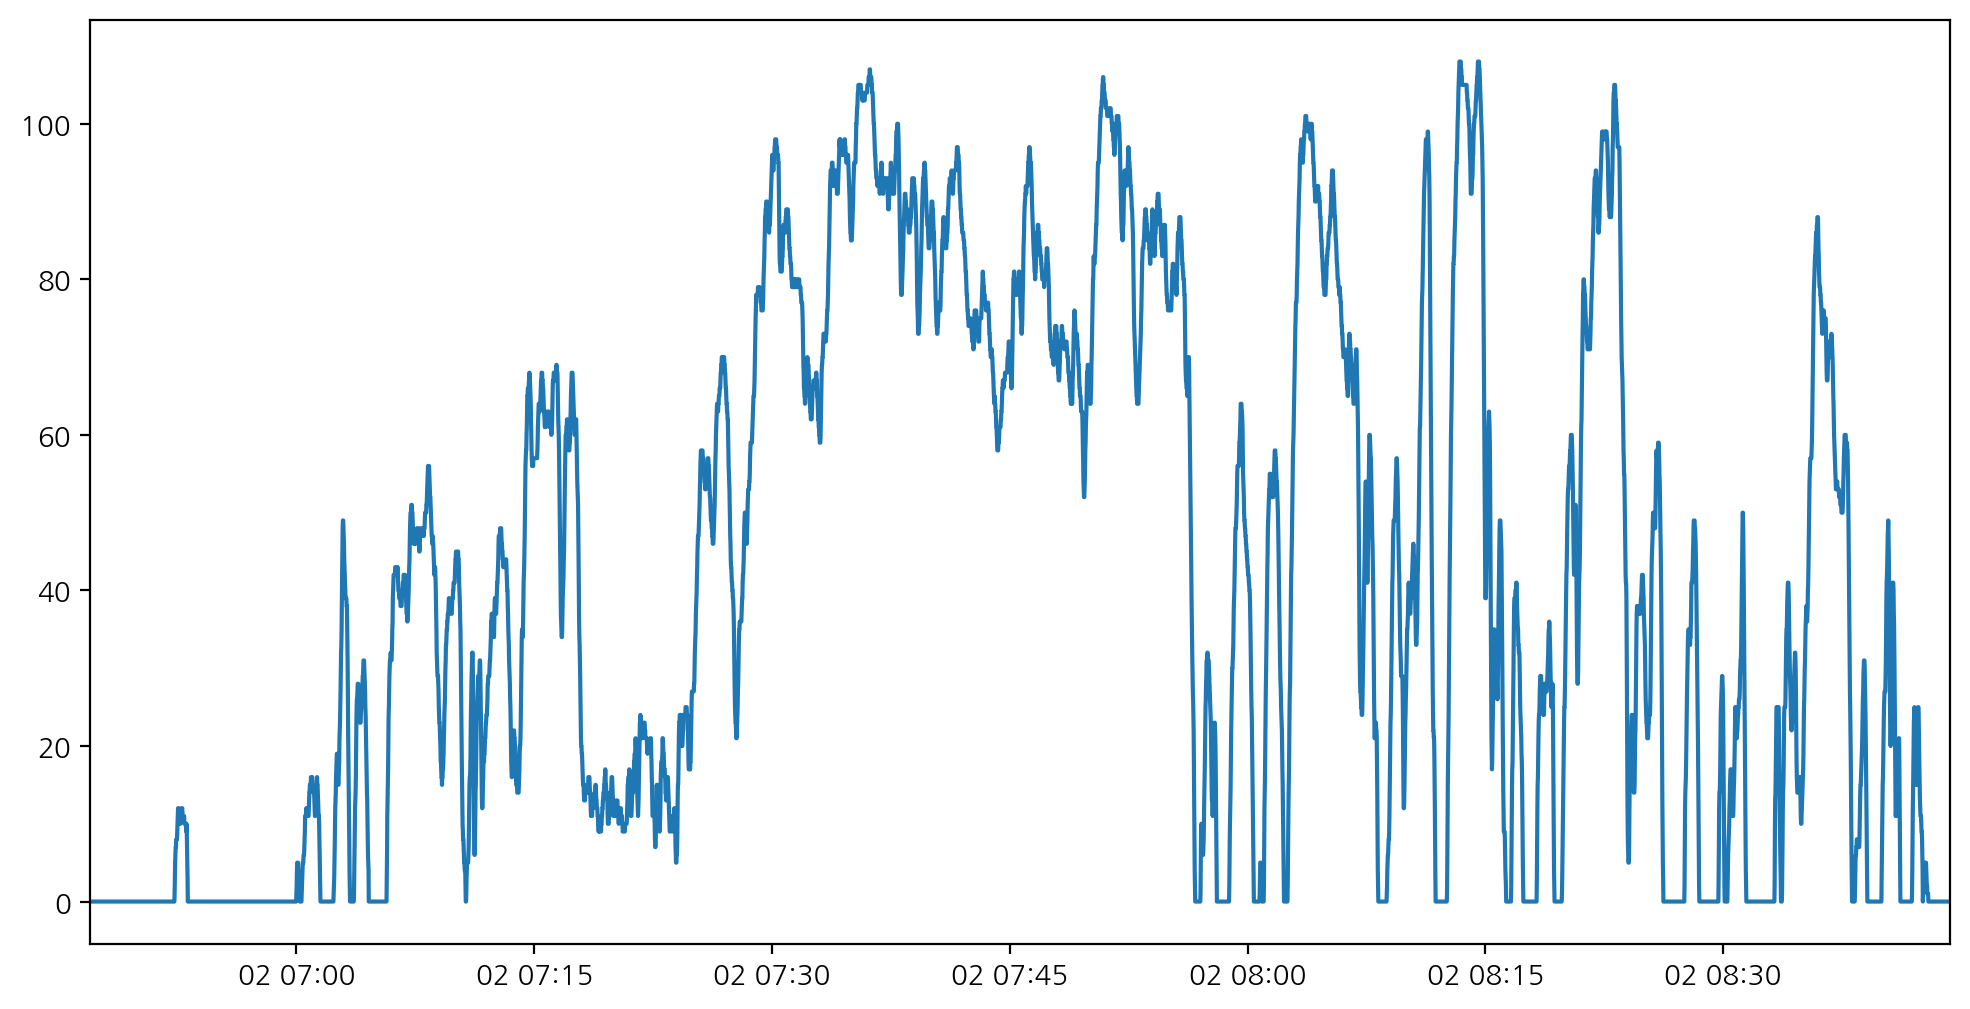

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 df_ts가 주어진 상태라고 가정합니다.
# 예를 들어, df_ts = pd.DataFrame({'정보발생일': ['2022-11-02 6:46:59', '2022-11-02 7:30:00', '2022-11-02 8:44:19'],
#                                 '차량속도': [60, 50, 45]})

# '정보발생일' 열의 값을 datetime 형식으로 변환합니다.
df_ts['정보발생일'] = pd.to_datetime(df_ts['정보발생일'])

plt.figure(figsize=(12, 6))

# x축에 사용할 값과 y축에 사용할 값을 설정합니다.
x_values = df_ts['정보발생일']
y_values = df_ts['차량속도']

# 그래프를 그립니다.
plt.plot(x_values, y_values)

# 원하는 x축 범위 설정 (예: 2022-11-02 6:46:59부터 2022-11-02 8:44:19까지)
plt.xlim(pd.to_datetime('2022-11-02 6:46:59'), pd.to_datetime('2022-11-02 8:44:19'))

# 그래프를 표시합니다.
plt.show()

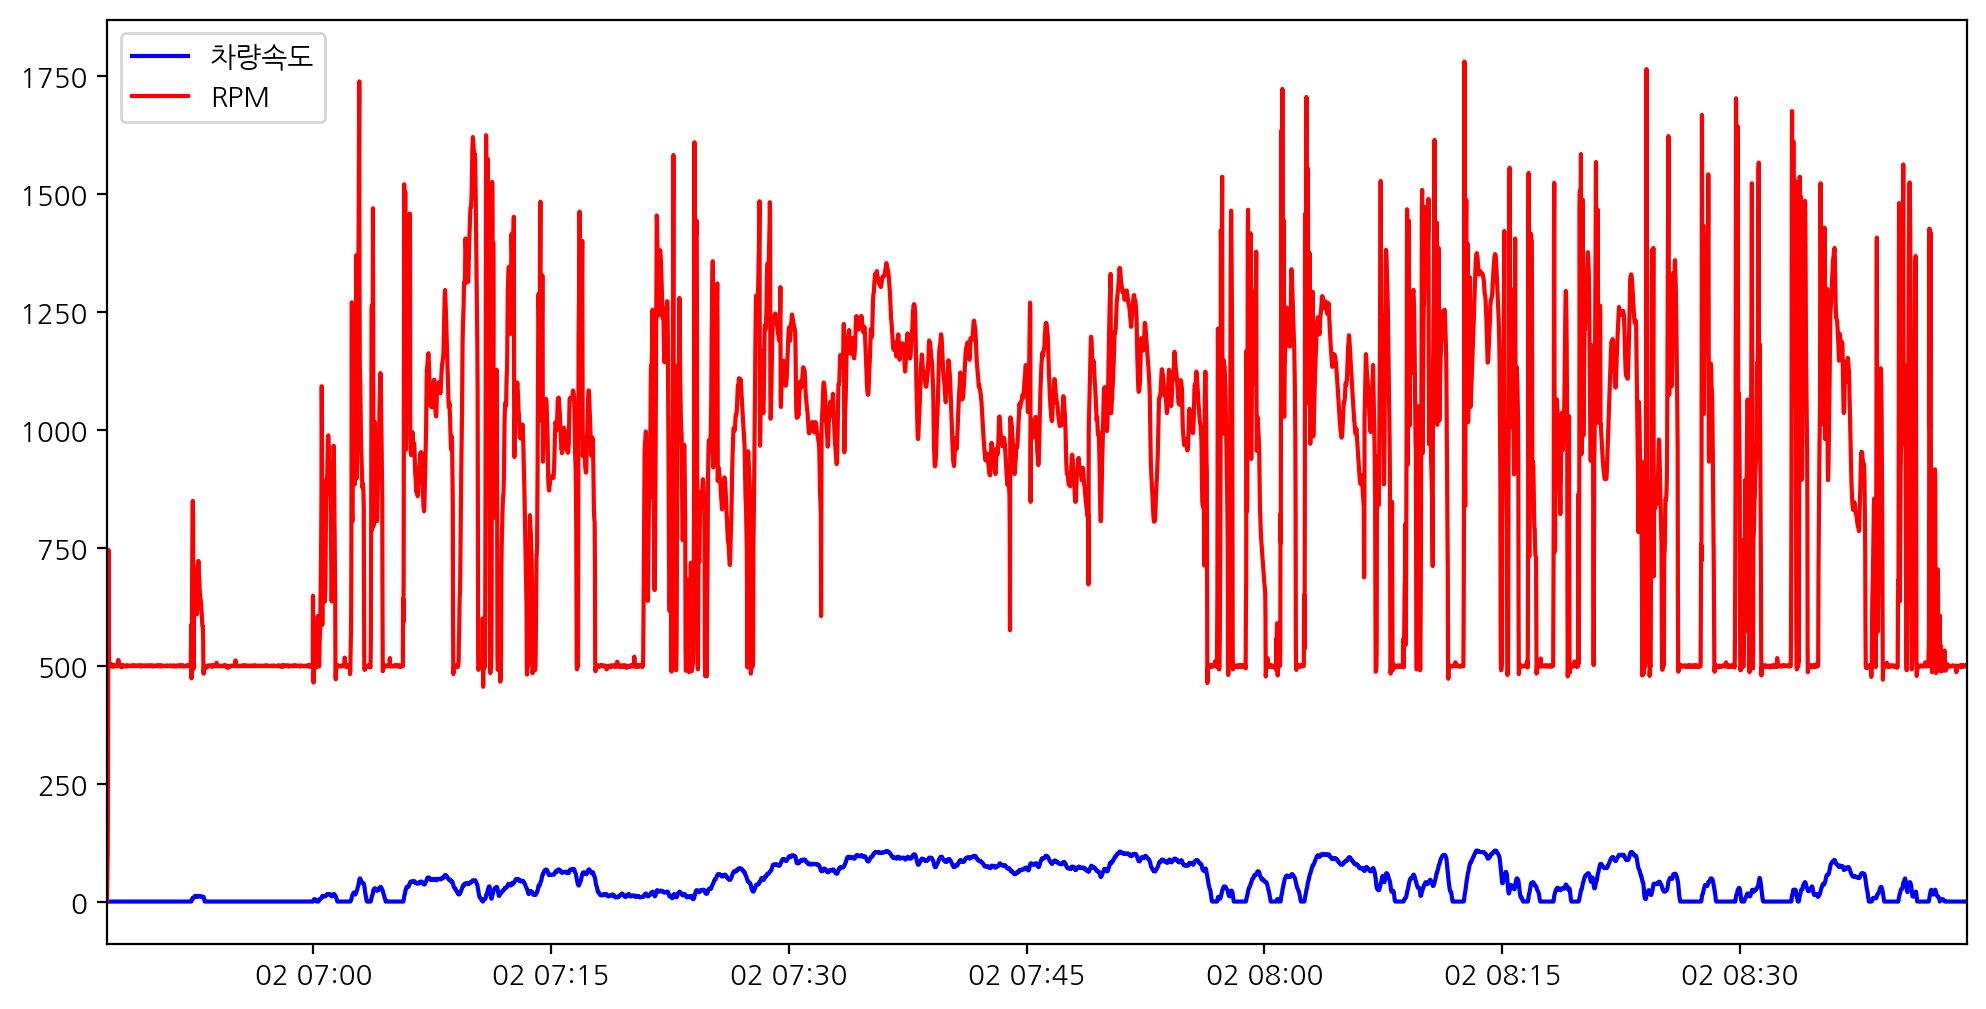

In [19]:
# '정보발생일' 열의 값을 datetime 형식으로 변환합니다.
df_ts['정보발생일'] = pd.to_datetime(df_ts['정보발생일'])

# x축에 사용할 값과 y축에 사용할 값을 설정합니다.
x_values = df_ts['정보발생일']
y_values_speed = df_ts['차량속도']
y_values_rpm = df_ts['RPM']

# 새로운 그림을 생성하고 그림의 크기를 설정합니다.
plt.figure(figsize=(12, 6))  # 가로 12인치, 세로 6인치 크기의 그림 생성

# '차량속도' 데이터를 그래프로 표시합니다.
plt.plot(x_values, y_values_speed, label='차량속도', color='blue')

# 'RPM' 데이터를 그래프로 표시합니다.
plt.plot(x_values, y_values_rpm, label='RPM', color='red')

# 원하는 x축 범위 설정 (예: 2022-11-02 6:46:59부터 2022-11-02 8:44:19까지)
plt.xlim(pd.to_datetime('2022-11-02 6:46:59'), pd.to_datetime('2022-11-02 8:44:19'))

# 그래프의 x축과 y축에 레이블 추가 등 필요한 설정을 수행합니다.

# 범례 추가
plt.legend()

# 그래프를 표시합니다.
plt.show()

## RPM 시각화

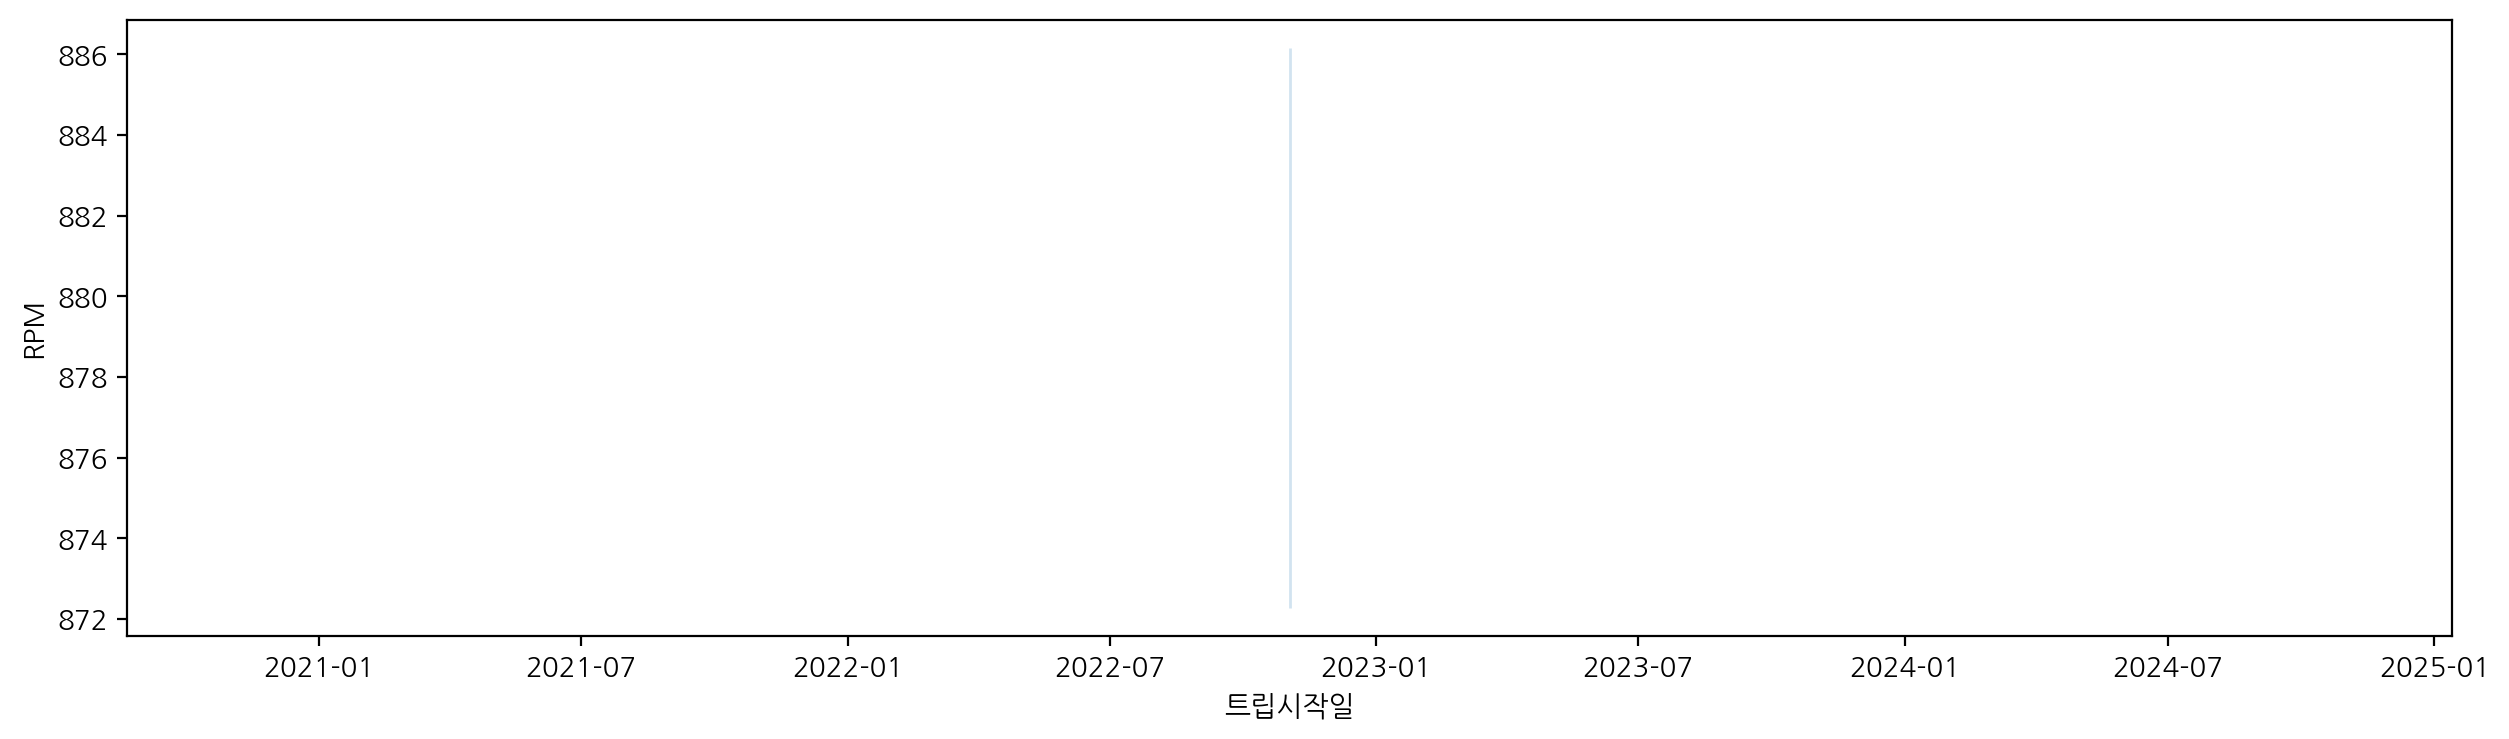

In [53]:
df_ts['트립시작일'] = pd.to_datetime(df_ts['트립시작일'])

plt.figure(figsize=(15,4))
sns.lineplot(data=df_ts, x='트립시작일', y='RPM')
plt.show()

In [55]:
df_ts['정보발생일']

0       2022-11-02 6:46:59
1       2022-11-02 6:47:02
2       2022-11-02 6:47:03
3       2022-11-02 6:47:04
4       2022-11-02 6:47:05
               ...        
7036    2022-11-02 8:44:15
7037    2022-11-02 8:44:16
7038    2022-11-02 8:44:17
7039    2022-11-02 8:44:18
7040    2022-11-02 8:44:19
Name: 정보발생일, Length: 7041, dtype: object

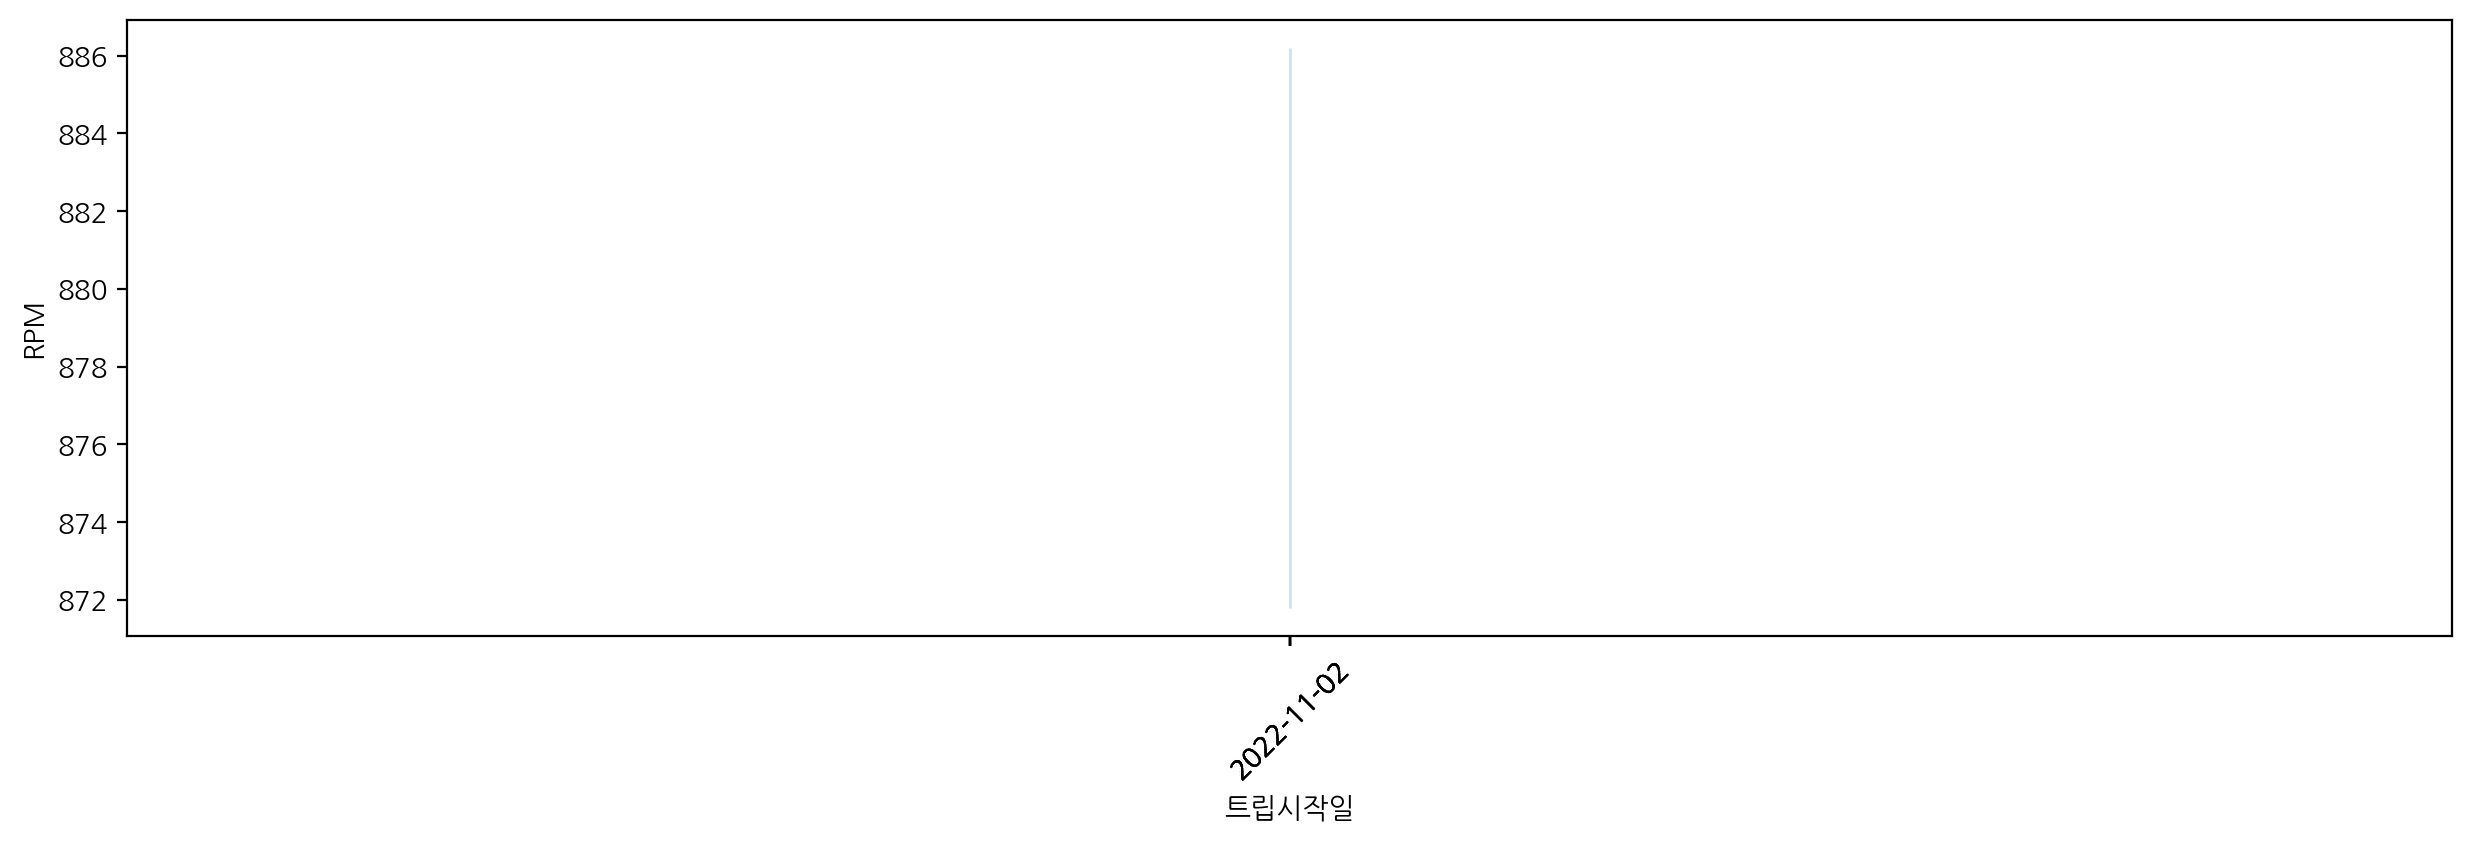

In [57]:
plt.figure(figsize=(15,4))

start = pd.to_datetime('2022-11-02 06:46:59')
end = '2022-11-02 8:44:19'

date_range = pd.date_range(start=start2022-11-02 8:44:19', freq='20T')
sns.lineplot(data=df_ts, x='트립시작일', y='RPM')
plt.xticks(date_range, rotation=45)
plt.show()

# 기기상태 오류 판단

In [ ]:
# '정보발생일' 열의 값을 datetime 형식으로 변환
df_ts['정보발생일'] = pd.to_datetime(df_ts['정보발생일'])

# '기기상태' 열의 값을 정수로 변환
df_ts['기기상태'] = df_ts['기기상태'].astype(int)

In [51]:
df_ts['기기상태'].value_counts()

기기상태
0     6990
11      51
Name: count, dtype: int64

In [54]:
# '정보발생일' 열의 값을 datetime 형식으로 변환
df_ts['정보발생일'] = pd.to_datetime(df_ts['정보발생일'])

# '기기상태' 열의 값을 정수로 변환
df_ts['기기상태'] = df_ts['기기상태'].astype(int)

# 에러 판단을 위한 루프 돌리기
error_start_time = None
df_ts['error'] = False  # 초기에 모든 행의 'error' 열은 False로 설정

for idx, row in df_ts.iterrows():
    if row['기기상태'] == 11:
        if error_start_time is None:
            error_start_time = row['정보발생일']
        else:
            time_diff = row['정보발생일'] - error_start_time
            if time_diff.total_seconds() >= 900:
                df_ts.loc[idx, 'error'] = True
    else:
        error_start_time = None

In [55]:
df_ts['error'].value_counts()

error
False    7041
Name: count, dtype: int64

In [59]:
print(df_ts)

            단말ID               차대번호            트립시작일               정보발생일   
0     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:46:59  \
1     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:47:02   
2     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:47:03   
3     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:47:04   
4     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:47:05   
...          ...                ...              ...                 ...   
7036  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:15   
7037  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:16   
7038  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:17   
7039  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:18   
7040  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:19   

       누적주행거리  일일주행거리  차량속도  RPM  브레이크상태      차량위치X  ...     메시지생성일자  메시지생성시간   
0     

In [61]:
df_ts['정보발생일'] = pd.to_datetime(df_ts['정보발생일'])

# '기기상태' 열의 값을 정수로 변환
df_ts['기기상태'] = df_ts['기기상태'].astype(int)

# 에러 판단을 위한 루프
error_start_time = None
df_ts['error'] = "NaN"  # 초기에 모든 행의 'error' 열은 False로 설정

for idx, row in df_ts.iterrows():
    if row['기기상태'] == 11:
        if error_start_time is None:
            error_start_time = row['정보발생일']
        else:
            time_diff = row['정보발생일'] - error_start_time
            if time_diff.total_seconds() >= 900:  # 900초(15분) 이상인 경우 'error'로 판단
                df_ts.loc[idx, 'error'] = True
    else:
        error_start_time = None

# 에러가 연속적으로 유지되는 경우를 찾아 'error' 열에 True로 표시합니다.

# 'error' 열의 변수 종류 확인
error_counts = df_ts['error'].value_counts()

print(df_ts)
print(error_counts)

            단말ID               차대번호            트립시작일               정보발생일   
0     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:46:59  \
1     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:47:02   
2     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:47:03   
3     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:47:04   
4     1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 06:47:05   
...          ...                ...              ...                 ...   
7036  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:15   
7037  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:16   
7038  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:17   
7039  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:18   
7040  1229493044  KMJKG18KPGC011451  2022-11-02 6:47 2022-11-02 08:44:19   

       누적주행거리  일일주행거리  차량속도  RPM  브레이크상태      차량위치X  ...     메시지생성일자  메시지생성시간   
0     

In [1]:
df["운전자코드"].unique()

NameError: name 'df' is not defined